# Fiji Analyse particles
This notebook is an **interactive tutorial** about how to use the Fiji tool  **Analyse particles** with BioImageIT. 


In [1]:
# Import the libraries
import sys
sys.path.append("../../bioimagepy")
from bioimagepy.process import BiProcess, bi_io_print
from bioimagepy.core import BiConfig

import imageio
from ipywidgets import interact_manual
import matplotlib.pyplot as plt

from IPython.display import clear_output

# Load the data

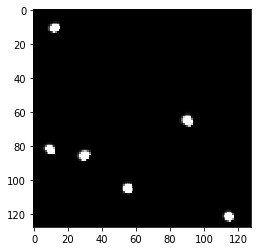

In [2]:
# visualize input image
input_image_path='../Data/analyse_particles.tif'

input_image=imageio.imread(input_image_path)
plt.imshow(input_image,cmap='gist_gray')

# Interactive parameter selection

In [3]:
# Interactive parameters selection
output=None
def run_process(threshold):
    global output_image
    myprocess=BiProcess('../../toolshed/fiji/threshold_particles.xml')
    myprocess.setConfig(BiConfig("../../toolshed/config.json"))
    output=myprocess.run('-input', input_image,
                '-threshold', threshold)
                

    clear_output()
    plt.figure(figsize = (10,80))
    plt.subplot(1,2,1)                      
    plt.imshow(input_image,cmap="gist_gray")
    plt.subplot(1,2,2)
    plt.imshow(imageio.imread(output["-draw"]))
    
    print("particles count = ")
    bi_io_print(output["-count"])
    print("particles measures = ")
    bi_io_print(output["-measures"])
    # plt.show()
    
# run_ndsafir(patch=3, iteration=4)
interact_manual(run_process,threshold=['Default dark', 'Huang dark', 'Intermodes dark', 'IsoData dark', 'Li dark', 'MaxEntropy dark', 'Mean dark', 'MinError dark', 'Minimum dark', 'Moments dark', 'Otsu dark', 'Percentile dark', 'RenyiEntropy dark', 'Shanbhag dark', 'Triangle dark', 'Yen dark'])

interactive(children=(Dropdown(description='threshold', options=('Default dark', 'Huang dark', 'Intermodes dar…

<function __main__.run_process(threshold)>